In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker

In [3]:
import pandas as pd
loc_data = pd.read_csv("./air-quality-data-from-extensive-network-of-sensors/sensor_locations.csv")

In [42]:
lat_228 = loc_data[loc_data['id']==228]['latitude'].tolist()
lon_228 = loc_data[loc_data['id']==228]['longitude'].tolist()

In [4]:
lats = loc_data['latitude'].tolist()
lons = loc_data['longitude'].tolist()

In [7]:
filenames = ["january-2017.csv","february-2017.csv","march-2017.csv","april-2017.csv","may-2017.csv","june-2017.csv","july-2017.csv","august-2017.csv","september-2017.csv","october-2017.csv","november-2017.csv","december-2017.csv"]
path =r'./air-quality-data-from-extensive-network-of-sensors/'

li = []

for filename in filenames:
    fname = path + filename 
    df = pd.read_csv(fname, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)


In [8]:
col_idx = [0]
j = 0
i=0
while i<337:
    i = 5+j*6
    col_idx = col_idx + [i]
    j=j+1
col_idx = col_idx[:-1]    

In [11]:
pm25 = pd.DataFrame()
pm25['UTC time'] = frame[frame.columns[col_idx[0]]]
for i in range(len(col_idx)-1):
    pm25[frame.columns[col_idx[i+1]]] = frame[frame.columns[col_idx[i+1]]]

In [17]:
pm25['UTC time'] = pd.to_datetime(pm25['UTC time'])

In [68]:

import plotly 
plotly.tools.set_credentials_file(username='gauravsm', api_key='yDhHOD5ueKUYqYb9xKpo')


import plotly.plotly as py
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1IjoiZ2F1cmF2c20iLCJhIjoiY2p2YzQ1dmtuMG02MzN5cDg1d3dsemttaCJ9.lV389_9mffK9Nk4O6Nzv_A'

datas = []

data = [
    go.Scattermapbox(
        lat=lats,
        lon=lons,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        #text=[''],
        name = 'Other Sonsors'
    ),
    
]

datas = datas + data

data = [
    go.Scattermapbox(
        lat=lat_228,
        lon=lon_228,
        mode='markers',
        marker=go.scattermapbox.Marker(
            color = "rgb(255,65,54)",
            size=14
        ),
        #text=[''],
        name = 'Sensor 228'
    ),
]

datas = datas + data

layout = go.Layout(
    title = 'Location of Sensor 228',
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=50.057748,
            lon=19.961375
        ),
        pitch=0,
        zoom=10
    ),
)

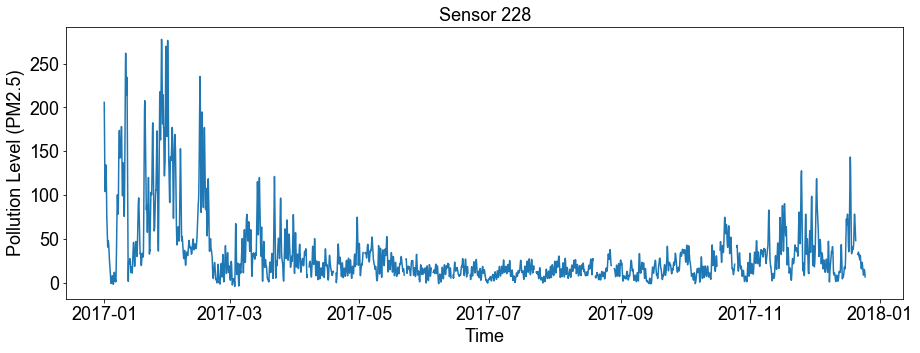

In [73]:
%matplotlib inline
import matplotlib.dates as mdates
from scipy.signal import savgol_filter



rcParams['font.family'] = 'arial'
f1 = plt.figure(figsize=(15,5))
ax1 = f1.add_subplot(1,1,1)

x = pm25['UTC time']
y = savgol_filter(pm25['228_pm25'], 21, 3)
ax1.plot(x,y)

ax1.set_xlabel('Time',fontsize=18)
ax1.set_ylabel('Pollution Level (PM2.5)',fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.set_title('Sensor 228',fontsize=18)
plt.savefig("Pollution 228.png")

# _=plt.xticks(rotation=90)    
fig = go.Figure(datas, layout=layout)
py.iplot(fig, filename='Krakow Mapbox 228')